In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import shapely
import os
import time
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon
from osgeo import gdal

In [173]:
statecensus = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2021_37_tabblock20/tl_2021_37_tabblock20.shp')

In [174]:
statecensus

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,037,020203,2037,370370202032037,Block 2037,G5040,R,None,None,S,2401181,1879,+35.7514163,-079.2909223,"POLYGON ((-79.29947 35.75562, -79.29942 35.756..."
1,37,105,030401,1015,371050304011015,Block 1015,G5040,R,None,None,S,537166,1888,+35.4895705,-079.1541245,"POLYGON ((-79.16050 35.48907, -79.15995 35.489..."
2,37,183,053615,2052,371830536152052,Block 2052,G5040,R,None,None,S,0,10154,+35.8791781,-078.8085709,"POLYGON ((-78.80964 35.87904, -78.80962 35.879..."
3,37,035,011501,2036,370350115012036,Block 2036,G5040,R,None,None,S,2009262,7616,+35.5829239,-081.0441821,"POLYGON ((-81.05569 35.58896, -81.05537 35.589..."
4,37,037,020201,2003,370370202012003,Block 2003,G5040,R,None,None,S,1557161,14689,+35.8325256,-079.3723536,"POLYGON ((-79.37919 35.83136, -79.37905 35.831..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236633,37,071,031304,2029,370710313042029,Block 2029,G5040,R,None,None,S,74013,0,+35.2676867,-081.0900213,"POLYGON ((-81.09237 35.26717, -81.09205 35.267..."
236634,37,021,002000,2029,370210020002029,Block 2029,G5040,R,None,None,S,24514,0,+35.5604522,-082.5081656,"POLYGON ((-82.50871 35.55948, -82.50871 35.559..."
236635,37,119,006311,1013,371190063111013,Block 1013,G5040,R,None,None,S,2061,0,+35.4387963,-080.8167143,"POLYGON ((-80.81699 35.43882, -80.81695 35.438..."
236636,37,035,011801,1007,370350118011007,Block 1007,G5040,R,None,None,S,217299,0,+35.6649741,-081.4300628,"POLYGON ((-81.43588 35.66367, -81.43569 35.663..."


In [175]:
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')

In [176]:
policebeats

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."
...,...,...,...,...,...,...,...,...,...,...,...
114,115,7055.019043,I,no,D3,324,324,None,1.669570e+06,7055.019084,"POLYGON ((-78.99155 35.88848, -78.99155 35.888..."
115,116,5532.483887,None,None,DSO,999,DSO,None,1.635085e+06,5532.483860,"POLYGON ((-78.83020 35.88529, -78.83020 35.885..."
116,117,5189.336914,I,no,D4,422,422,None,1.467878e+06,5189.336960,"POLYGON ((-78.93384 35.87957, -78.93383 35.880..."
117,118,18538.599609,I,no,D4,422,422,None,7.011386e+06,18538.594858,"POLYGON ((-78.93731 35.87502, -78.93724 35.875..."


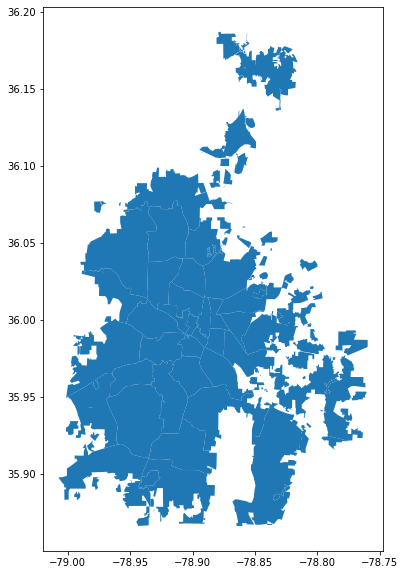

In [177]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax=ax)
plt.show()

In [178]:
policebeats.explore()

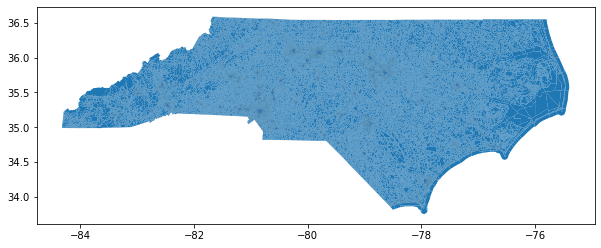

In [179]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
statecensus.plot(ax=ax)
plt.show()

In [180]:
occupancy = gpd.read_file('/Users/sadiesheridan/Desktop/DECENNIALPL2020.H1_2022-05-25T115108/DECENNIALPL2020.H1_data_with_overlays_2022-05-25T111439.csv')

In [181]:
occupancy

,GEO_ID,NAME,H1_001N,H1_002N,H1_003N,geometry
0,id,Geographic Area Name,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant,None
1,1000000US370630001011000,"Block 1000, Block Group 1, Census Tract 1.01, ...",44,44,0,None
2,1000000US370630001011001,"Block 1001, Block Group 1, Census Tract 1.01, ...",15,15,0,None
3,1000000US370630001011002,"Block 1002, Block Group 1, Census Tract 1.01, ...",17,17,0,None
4,1000000US370630001011003,"Block 1003, Block Group 1, Census Tract 1.01, ...",20,16,4,None
...,...,...,...,...,...,...
4397,1000000US370639801001068,"Block 1068, Block Group 1, Census Tract 9801, ...",0,0,0,None
4398,1000000US370639801001069,"Block 1069, Block Group 1, Census Tract 9801, ...",0,0,0,None
4399,1000000US370639801001070,"Block 1070, Block Group 1, Census Tract 9801, ...",0,0,0,None
4400,1000000US370639801001071,"Block 1071, Block Group 1, Census Tract 9801, ...",0,0,0,None


In [182]:
race = gpd.read_file('/Users/sadiesheridan/Desktop/DECENNIALPL2020.P1_2022-05-25T115247/DECENNIALPL2020.P1_data_with_overlays_2022-05-25T115117.csv')

In [183]:
race

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N,geometry
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,None
1,1000000US370630001011000,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,...,0,0,0,0,0,0,0,0,0,None
2,1000000US370630001011001,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,...,0,0,0,0,0,0,0,0,0,None
3,1000000US370630001011002,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,...,0,0,0,0,0,0,0,0,0,None
4,1000000US370630001011003,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,...,0,0,0,0,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1000000US370639801001068,"Block 1068, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
4398,1000000US370639801001069,"Block 1069, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
4399,1000000US370639801001070,"Block 1070, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
4400,1000000US370639801001071,"Block 1071, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None


In [184]:
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331072,21478347,None,12/31/2021,11:55:01PM,E-911,4,LARCENY,1100 N HYDE PARK AVE,2034985,817867,D1,112,Cancelled,1,POINT (2034985.00000 817867.00000)
331073,21478348,None,12/31/2021,11:56:11PM,Wireless 911 Call,4,NOISE COMPLAINT,400 E PILOT ST,2027034,806173,D4,412,Information Relayed,1,POINT (2027034.00000 806173.00000)
331074,21478349,None,12/31/2021,11:57:01PM,Wireless 911 Call,3,SOUND OF SHOTS,1200 WABASH ST,2032917,809579,D4,413,Information Relayed,1,POINT (2032917.00000 809579.00000)
331075,21478350,None,12/31/2021,11:57:09PM,Wireless 911 Call,3,SOUND OF SHOTS,500 PICKWICK TRL,2032932,834244,D2,223,Information Relayed,1,POINT (2032932.00000 834244.00000)


In [185]:
type(dpdcalls)

geopandas.geodataframe.GeoDataFrame

In [186]:
dpdcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)


In [187]:
dpdcalls.columns

Index(['Event Numb', 'Case Numbe', 'Call Date', 'Call Time', 'Source',
       'Priority', 'Nature', 'Address', 'X', 'Y', 'District', 'Beat',
       'Dispositio', 'Cancelled', 'geometry'],
      dtype='object')

In [188]:
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [189]:
dpdcalls["Source"].value_counts()

Self Initiated                   163182
Wireless 911 Call                 85254
Phone Call                        44729
E-911                             16634
Alarm Line                         9935
ASAP Alarm Interface               4090
{Other}                            2747
Language Line                      1590
Mobil                               917
Report Only                         890
Radio                               540
Texting                             348
DCI Message                         157
In House Translation                 39
Telephone Device For The Deaf        17
(blank)                               8
Name: Source, dtype: int64

In [190]:
dpdcalls["Nature"].value_counts()

DIRECTED PATROL             91901
PROPERTY CHECK              14972
ALARM                       14053
HANG UP WIRELESS PHASE 2    13238
VEHICLE STOP                12741
                            ...  
Family disturbance              1
FALL                            1
Civil issue                     1
COVID-19 LEVEL 0                1
GAS LEAK OR ODOR                1
Name: Nature, Length: 260, dtype: int64

In [191]:
dpdcalls["District"].value_counts()

D4     78021
D2     74827
D3     69943
D1     62201
D5     34273
DSO       69
Name: District, dtype: int64

<AxesSubplot:>

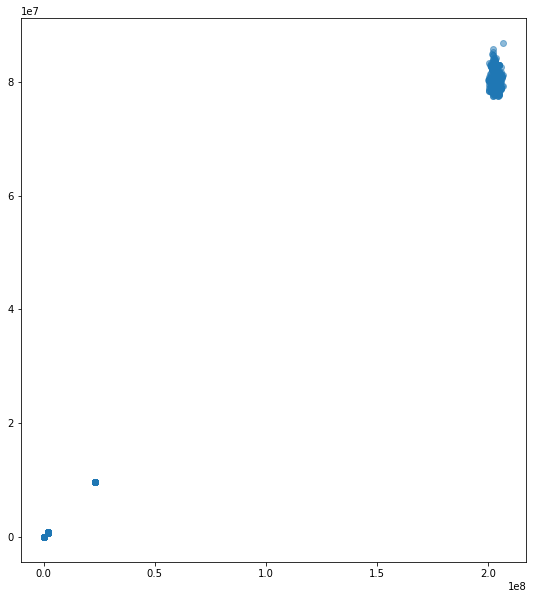

In [192]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
dpdcalls.plot(ax = ax, alpha = 0.5)
# plt.show()

In [193]:
# Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
127,21000194,None,1/1/2021,1:25:25AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 11 147 NB,0,0,None,None,(blank),0,POINT (0.00000 0.00000)
131,21000199,None,1/1/2021,1:29:04AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 147S AND BLACKWELL ST,0,0,None,None,(blank),0,POINT (0.00000 0.00000)
210,21000322,None,1/1/2021,3:56:22AM,Self Initiated,5,DIRECTED PATROL,3407 3RD FORK RD,0,0,None,None,Cancelled,1,POINT (0.00000 0.00000)
255,21000381,None,1/1/2021,6:14:49AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY,0,0,None,None,(blank),0,POINT (0.00000 0.00000)
274,21000409,None,1/1/2021,7:03:23AM,Self Initiated,4,FOLLOW UP,SS1,0,0,None,None,Resolved Without Report,0,POINT (0.00000 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330699,21477803,21045233,12/31/2021,6:00:48PM,Mobil,4,ATTEMPT TO LOCATE,UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...,0,0,None,None,(blank),0,POINT (0.00000 0.00000)
330858,21478039,None,12/31/2021,8:24:41PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...,0,0,None,None,(blank),0,POINT (0.00000 0.00000)
330963,21478179,None,12/31/2021,10:06:37PM,Self Initiated,4,PROPERTY CHECK,1223 HOMECOMING WY,0,0,None,None,Resolved Without Report,0,POINT (0.00000 0.00000)
331057,21478324,None,12/31/2021,11:45:43PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 17900 I85 S,0,0,None,None,(blank),0,POINT (0.00000 0.00000)


In [194]:
df = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
df.shape

(322145, 15)

<AxesSubplot:>

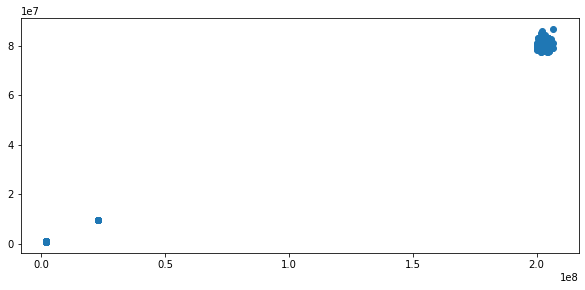

In [195]:
# plotting again
fig, ax = plt.subplots(figsize = (10,10))
df.plot(ax = ax, aspect=1)

<AxesSubplot:>

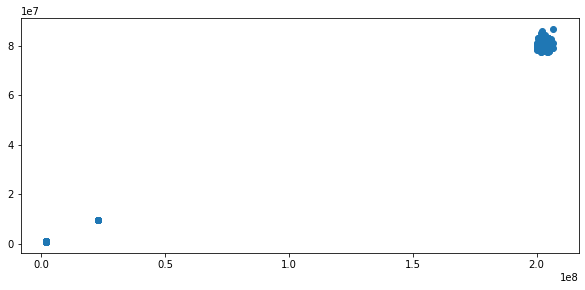

In [196]:
# plotting again
fig, ax = plt.subplots(figsize = (10,10))
df.plot(ax = ax, aspect=1)

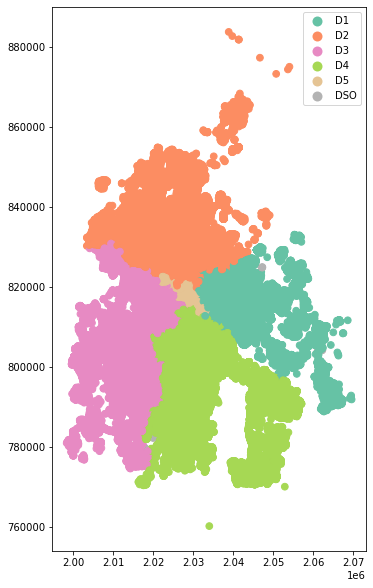

In [197]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
df.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax, aspect=1);

In [198]:
df2 = df.loc[df["Cancelled"] == 0]
df2

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331059,21478329,None,12/31/2021,11:49:24PM,Self Initiated,4,PROPERTY CHECK,900 LAMBETH CIR,2014984,821360,D3,313,Resolved Without Report,0,POINT (2014984.00000 821360.00000)
331060,21478332,None,12/31/2021,11:49:51PM,Self Initiated,5,DIRECTED PATROL,W CHAPEL HILL ST/S BUCHANAN BLVD,2025100,817723,D3,312,Resolved Without Report,0,POINT (2025100.00000 817723.00000)
331064,21478336,None,12/31/2021,11:51:01PM,Wireless 911 Call,3,TRESPASS OR UNWANTED,1600 T W ALEXANDER DR,2045831,791379,D4,423,Unfounded,0,POINT (2045831.00000 791379.00000)
331065,21478338,None,12/31/2021,11:51:22PM,Wireless 911 Call,2,UNKNOWN PROBLEM POLICE,3700 MERIWETHER DR,2032628,832985,D2,223,Resolved Without Report,0,POINT (2032628.00000 832985.00000)


In [199]:
df2

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331059,21478329,None,12/31/2021,11:49:24PM,Self Initiated,4,PROPERTY CHECK,900 LAMBETH CIR,2014984,821360,D3,313,Resolved Without Report,0,POINT (2014984.00000 821360.00000)
331060,21478332,None,12/31/2021,11:49:51PM,Self Initiated,5,DIRECTED PATROL,W CHAPEL HILL ST/S BUCHANAN BLVD,2025100,817723,D3,312,Resolved Without Report,0,POINT (2025100.00000 817723.00000)
331064,21478336,None,12/31/2021,11:51:01PM,Wireless 911 Call,3,TRESPASS OR UNWANTED,1600 T W ALEXANDER DR,2045831,791379,D4,423,Unfounded,0,POINT (2045831.00000 791379.00000)
331065,21478338,None,12/31/2021,11:51:22PM,Wireless 911 Call,2,UNKNOWN PROBLEM POLICE,3700 MERIWETHER DR,2032628,832985,D2,223,Resolved Without Report,0,POINT (2032628.00000 832985.00000)


In [200]:
df3 = df2.loc[df["Source"] != "Self Initiated"]
df3

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.00000 818537.00000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.00000 815902.00000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.00000 841530.00000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.00000 796806.00000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.00000 818259.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331053,21478311,None,12/31/2021,11:40:26PM,Wireless 911 Call,3,SOUND OF SHOTS,E CORNWALLIS RD/S ROXBORO ST,2023820,806257,D4,412,Resolved Without Report,0,POINT (2023820.00000 806257.00000)
331055,21478321,None,12/31/2021,11:45:14PM,Wireless 911 Call,3,SUSPICIOUS ACTIVITY,2400 GLENBROOK DR,2036593,828406,D2,214,Resolved Without Report,0,POINT (2036593.00000 828406.00000)
331056,21478322,None,12/31/2021,11:45:24PM,Phone Call,P,UNKNOWN PROBLEM EMS,200 OMEGA RD,2028331,846873,D2,224,Resolved Without Report,0,POINT (2028331.00000 846873.00000)
331064,21478336,None,12/31/2021,11:51:01PM,Wireless 911 Call,3,TRESPASS OR UNWANTED,1600 T W ALEXANDER DR,2045831,791379,D4,423,Unfounded,0,POINT (2045831.00000 791379.00000)


In [201]:
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [202]:
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [203]:
policebeats_convert.crs

<Derived Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Sto

In [204]:
dpdcalls_convert = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')

dpdcalls_convert = dpdcalls_convert.to_crs("epsg:2264")

In [205]:
df2 = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.X, df2.Y))
df2 = df2.set_crs("epsg:2264")

In [206]:
df2 = df2.to_crs("epsg:4326")

In [207]:
df2 = df2.to_file('/Users/sadiesheridan/Desktop/dpdshapefile copy 2')

/Users/sadiesheridan/opt/miniconda3/envs/sadie/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [208]:
df2.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


In [ ]:
#df2.set_crs(epsg=2264, inplace=True, allow_override=True)

/Users/sadiesheridan/opt/miniconda3/envs/sadie/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.000 818537.000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.000 815902.000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.000 841530.000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.000 796806.000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.000 818259.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331059,21478329,None,12/31/2021,11:49:24PM,Self Initiated,4,PROPERTY CHECK,900 LAMBETH CIR,2014984,821360,D3,313,Resolved Without Report,0,POINT (2014984.000 821360.000)
331060,21478332,None,12/31/2021,11:49:51PM,Self Initiated,5,DIRECTED PATROL,W CHAPEL HILL ST/S BUCHANAN BLVD,2025100,817723,D3,312,Resolved Without Report,0,POINT (2025100.000 817723.000)
331064,21478336,None,12/31/2021,11:51:01PM,Wireless 911 Call,3,TRESPASS OR UNWANTED,1600 T W ALEXANDER DR,2045831,791379,D4,423,Unfounded,0,POINT (2045831.000 791379.000)
331065,21478338,None,12/31/2021,11:51:22PM,Wireless 911 Call,2,UNKNOWN PROBLEM POLICE,3700 MERIWETHER DR,2032628,832985,D2,223,Resolved Without Report,0,POINT (2032628.000 832985.000)


<AxesSubplot:>

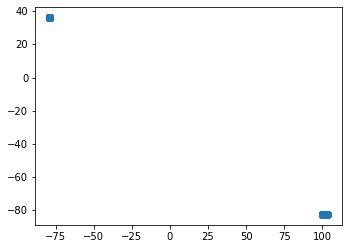

In [ ]:
# base = policebeats.plot()
# df2.plot(ax = base)

AttributeError: 'NoneType' object has no attribute 'plot'

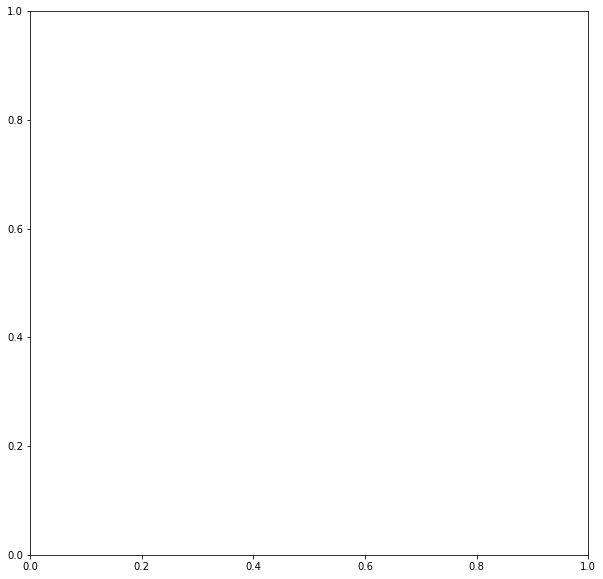

In [209]:
fig, ax=plt.subplots(figsize = (10,10))

df2.plot(column='Beat',
                    categorical=True,
                    legend=True,
                    figsize=(10,6),
                    markersize=0.0001,
                    cmap="Set2", ax=policebeats.plot(), aspect=1)